<center><font size=6><b>Hall A fits for Melany</b></font></center>

**Abstract:** Some small studies.

# Initializations

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import gepard as g
import gepard.plots as gplots
from gepard.fits import GLO15new, AUTIpts, ALUIpts

In [3]:
# This just gets my current git revision hash, in case version number above is not reliable.
# You should comment this cell out if your Gepard installation is not git cloned from github repository.
import os
import subprocess
branch = subprocess.check_output(['git', '-C', os.path.dirname(g.__file__),
                                  'branch', '--show-current']).decode('ascii').strip()
revhash = subprocess.check_output(['git', '-C', os.path.dirname(g.__file__),
                                   'rev-parse', 'HEAD']).decode('ascii').strip()
print('Current git branch is "{}" and revision hash is {}'.format(branch, revhash))

Current git branch is "torch" and revision hash is dd8be1422f6484dc0857c69157324948bc2b7db5


In [4]:
import torch
import numpy as np

In [5]:
import matplotlib
import matplotlib.pyplot as plt

In [6]:
def listchis(ths, Q2cut=1., Q2max=1.e3, nsets=2, out='chis'):
    """Compare theories for subsets of data.
    
    What is printed out depends on 'out' keyword argument:
     'chis'  --  chisquares
    'probs'  --  probabilities of chisquares
    'pulls'  --  sum((th-exp)/err)/sqrt(size)

    """
    if not isinstance(ths, list): ths = [ths]
    CLAS15ALUpts = g.dset[94]
    CLAS15ALL0pts = g.dset[96][:10]
    CLAS15ALL1pts = g.dset[96][10:] 
    CLAS15AULpts = g.dset[95]
    C_BSDwpts = g.dset[101]
    H_BSDwpts = g.dset[117]
    C_BSSw0pts = g.dset[102][:48]
    C_BSSw1pts = g.dset[102][48:]
    H17_BSDwpts = g.dset[135]
    H_BSSw0pts = g.dset[116][:10]
    H_BSSw1pts = g.dset[116][10:]
    H17_BSSw0pts = g.dset[136][:22]
    H17_BSSw1pts = g.dset[136][22:]
    BSDwpoints = g.select(g.dset[50], criteria=['FTn == -1'])
    BSSwpoints = g.select(g.dset[51], criteria=['FTn>=0', 'FTn <= 1'])
    HApts = BSDwpoints[::2] + BSSwpoints[::2]
    H20_nBSSw0pts = g.dset[140][:8]
    H20_nBSSw1pts = g.dset[140][8:]
    # CLAS22p = g.select(g.dset[150], criteria=['t > -0.5'])
    # CLAS22n = g.dset[151]
    sets = {}
    sets[1] = [
            ('CLAS 15', 'ALU_s1', CLAS15ALUpts),
            ('CLAS 15', 'ALL_c0', CLAS15ALL0pts),
            ('CLAS 15', 'ALL_c1', CLAS15ALL1pts),
            ('CLAS 15', 'AUL', CLAS15AULpts),
            ('CLAS 15', 'XLUw_s1', C_BSDwpts),
            ('HallA 15', 'XLUw_s1', H_BSDwpts),
	        ('CLAS 15', 'XUUw_c0', C_BSSw0pts),
            ('CLAS 15', 'XUUw_c1', C_BSSw1pts),
            ('HallA 17', 'XLUw_s1', H17_BSDwpts),
	        ('HallA 15', 'XUUw_c0', H_BSSw0pts),
            ('HallA 15', 'XUUw_c1', H_BSSw1pts),
	        ('HallA 17', 'XUUw_c0', H17_BSSw0pts),
            ('HallA 17', 'XUUw_c1', H17_BSSw1pts),
            # ('CLAS 2x', 'ALU_s1', CLAS22p),
            # ('CLAS 2x', 'nALU_s1', CLAS22n)
	        # ('HallA 20', 'nBSSw_c0', H20_nBSSw0pts),
	        # ('HallA 20', 'nBSSw_c1', H20_nBSSw1pts)
            ]
    sets[2] = [
            ('HallA 15', 'XLUw_s1', H_BSDwpts),
	        ('HallA 15', 'XUUw_c0', H_BSSw0pts),
            ('HallA 15', 'XUUw_c1', H_BSSw1pts),
            ('HallA 17', 'XLUw_s1', H17_BSDwpts),
	        ('HallA 17', 'XUUw_c0', H17_BSSw0pts),
            ('HallA 17', 'XUUw_c1', H17_BSSw1pts),
            ]
    names = [th.name[:10] for th in ths]
    sublines = ['------' for th in ths]
    if out == 'chis' or out == 'pulls':
        # We want chisq/npts
        ftit = 21*' ' + len(names)*'{:^10s}'
        fstr = '{:9s} {:7s}: ' + len(names)*'{:10.2f}' + '   (np ={dof:3d})'
        chi_ind = 0
    else:    
        # We want probabilities
        ftit = 20*' ' + len(names)*'{:<10s}'
        fstr = '{:9s} {:7s}:  ' + len(names)*'{:<10.3g}' + '   (np ={dof:3d})'
        chi_ind = 2
    print(ftit.format(*names))
    print(ftit.format(*sublines))
    total_chis = np.array([0. for th in ths])
    total_npts = 0
    for collab, obs, pts in sets[nsets]:
        cutpts = g.select(pts, criteria=['Q2>=%f' % Q2cut, 'Q2<=%f' % Q2max])
        npts = len(cutpts)
        if out == 'pulls':
            chis = [th.chisq(cutpts, pull=True)[chi_ind] for th in ths]
        else:
            chis = [th.chisq(cutpts)[chi_ind] for th in ths]
        total_chis += np.array(chis)
        total_npts += npts
        if out == 'pulls':
            quals = [chi/np.sqrt(npts) for chi in chis]
        else:
            quals = [chi/npts for chi in chis]
        print(fstr.format(collab, obs, *quals, dof=npts))
    if out == 'chis':
        # version with chisq/npts:
        total_chis = total_chis/total_npts
        print(ftit.format(*sublines))
        print(fstr.format('===', 'TOTAL', *total_chis.tolist(), dof=total_npts))

In [7]:
def CFFgridt(tha=[], cffs=['ImH', 'ImHt', 'ImE'], xB=0.36, Q2=4, npts=10):
    """PLots various CFFs comparisons."""
    NPTS = npts
    tms = np.linspace(0.15, 0.40, NPTS)

    hatches = ['\\\\', '////']
    colors = ['firebrick', 'forestgreen']
    kin_panel = (0, 0)
    
    fig, axs = plt.subplots(len(cffs), len(tha), sharex='col', sharey='row', figsize=[11, 4*len(cffs)])
    
    for (py, px), ax in np.ndenumerate(axs):

        cff = cffs[py]
        ths = tha[px]

        for nth, th in enumerate(ths):
            y = []
            yerr = []
            for tm in tms:
                pt = g.DataPoint(xB=xB, t=-tm, Q2=Q2)
                mean, std = th.predict(pt, observable=cff, uncertainty=True)
                y.append(mean)
                yerr.append(std)
            y = np.array(y)
            yerr = np.array(yerr)
            ax.fill_between(tms, y-yerr, y+yerr,
                        label='{}'.format(th.name), 
                        #color = 'firebrick', alpha = 0.6,
                        hatch = hatches[nth], facecolor='none', edgecolor=colors[nth],
                        linewidth=1.5, zorder=0)

        if px == 0:  # first column
            ax.set_ylabel(g.constants.toTeX[cff], fontsize=16, labelpad=-1)
        if py == len(cffs)-1:  # last row
            ax.set_xlabel(r'$-t\;[\mathrm{GeV}^2]$', fontsize=16, labelpad=-1)
        # ax.set_ylim(*ylims[cff])
        ax.axhline(y=0, linewidth=0.5, color='k', linestyle=':')  # y=0 thin line
        if py == 0:
            ax.legend(loc="upper right", handlelength=2.5,
                      prop=matplotlib.font_manager.FontProperties(size="medium")
                    ).draw_frame(0)
        if (px, py) == (1, 2):
            ax.annotate(r'$x_B = {:.2f}$, $Q^2 = {:.1f}\:\mathrm{{GeV}}^2$'.format(xB, Q2),
                        xy=(0.05,0.07), xycoords='axes fraction', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.tick_params(axis='both', which='minor', labelsize=16) 
    plt.subplots_adjust(hspace=0.0, wspace=0.0)
    return fig

In [8]:
g.constants.toTeX['ImH'] = r'$\mathfrak{Im}\,\mathcal{H}$'
g.constants.toTeX['ImE'] = r'$\mathfrak{Im}\,\mathcal{E}$'

# Hall A JLab datasets

In [9]:
# 2015 data
halla15 = g.dset[116] + g.dset[117]
g.describe_data(halla15)

npt x obs     collab  FTn    id  ref.        
----------------------------------------------
15 x XLUw    HALLA   -1     117 arXiv:1504.05453
10 x XUUw    HALLA   0.0    116 arXiv:1504.05453
10 x XUUw    HALLA   1.0    116 arXiv:1504.05453
----------------------------------------------
TOTAL = 35


In [10]:
# data organized in sets for fitting
HallA15_XLUw = [g.dset[117]]
HallA15w = [g.dset[117], g.dset[116][:15], g.dset[116][15:]]

In [11]:
# No problematic points in this dataset with -t/Q2 > 0.25 that would invalidate tw-2 approx
np.max([-pt.t/pt.Q2 for pt in halla15])

np.float32(0.22657686)

In [12]:
# 2017 data
halla17 = g.dset[135] + g.dset[136]
g.describe_data(halla17)

npt x obs     collab  FTn    id  ref.        
----------------------------------------------
18 x XLUw    HALLA   -1     135 arXiv:1703.09442
22 x XUUw    HALLA   0.0    136 arXiv:1703.09442
22 x XUUw    HALLA   1.0    136 arXiv:1703.09442
----------------------------------------------
TOTAL = 62


In [13]:
HallA17w = [g.dset[135], g.dset[136][:22], g.dset[136][22:]]

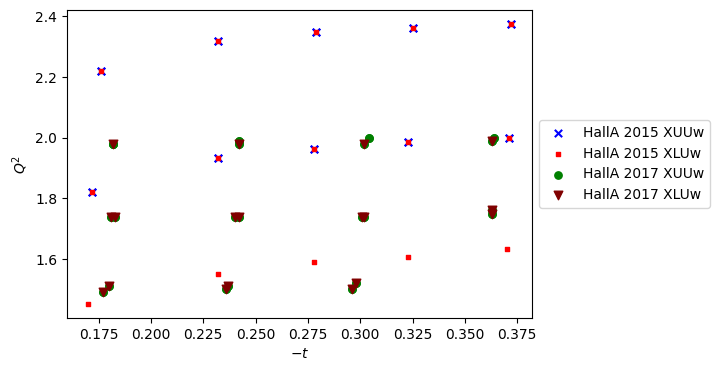

In [14]:
fig, ax = plt.subplots(1, 1, figsize=[6,4])
ax.scatter(g.dset[116].df().tm.values, [float(Q2) for Q2 in g.dset[116].df().Q2.values],
           color='blue', marker='x', s=28, label='HallA 2015 XUUw')
ax.scatter(g.dset[117].df().tm.values, [float(Q2) for Q2 in g.dset[117].df().Q2.values],
           color='red', marker='s', s=8, label='HallA 2015 XLUw')
ax.scatter(g.dset[136].df().tm.values, [float(Q2) for Q2 in g.dset[136].df().Q2.values],
           color='green', marker='o', s=28, label='HallA 2017 XUUw')
ax.scatter(g.dset[135].df().tm.values, [float(Q2) for Q2 in g.dset[135].df().Q2.values],
           color='maroon', marker='v', s=38, label='HallA 2017 XLUw')
ax.set_xlabel(r'$-t$')
ax.set_ylabel(r'$Q^2$')
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [15]:
# No problematic points in this dataset with -t/Q2 > 0.25 that would invalidate tw-2 approx
np.max([-pt.t/pt.Q2 for pt in halla17])

np.float32(0.20742859)

## Description of data by KM15 fit

This section is independent of the rest and need not be run (in case one doesn't want
to install extra copy of gepard).

In [16]:
# Copy of gepard package (devel branch) renamed into gdevel. 
# Needed for KM and other non-NNet stuff if you want to run it in same session with NNet torch branch.
### Procedure to make this available:
#  1. cp -ax gepard gdevel  (top dir from github)
#  2. change 'name' and 'package' variables in setup.cfg, and 'name' in setup.py  gepard -> gdevel
#  3. mv src/gepard src/gdevel
#  4. (activate the virtual python environment if needed)
#  5. pip install -e .
import gdevel

In [17]:
from gdevel.fits import th_KM15

In [18]:
import gdevel.plots

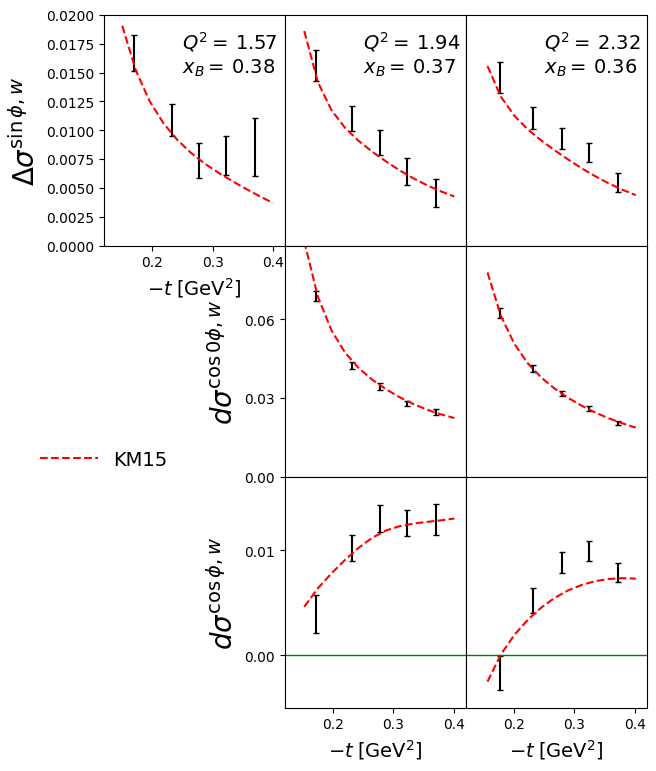

In [19]:
# The following fig is like Fig 2 (right) from arXiv:1512.0901
fig = gdevel.plots.HallA15(lines=[th_KM15])

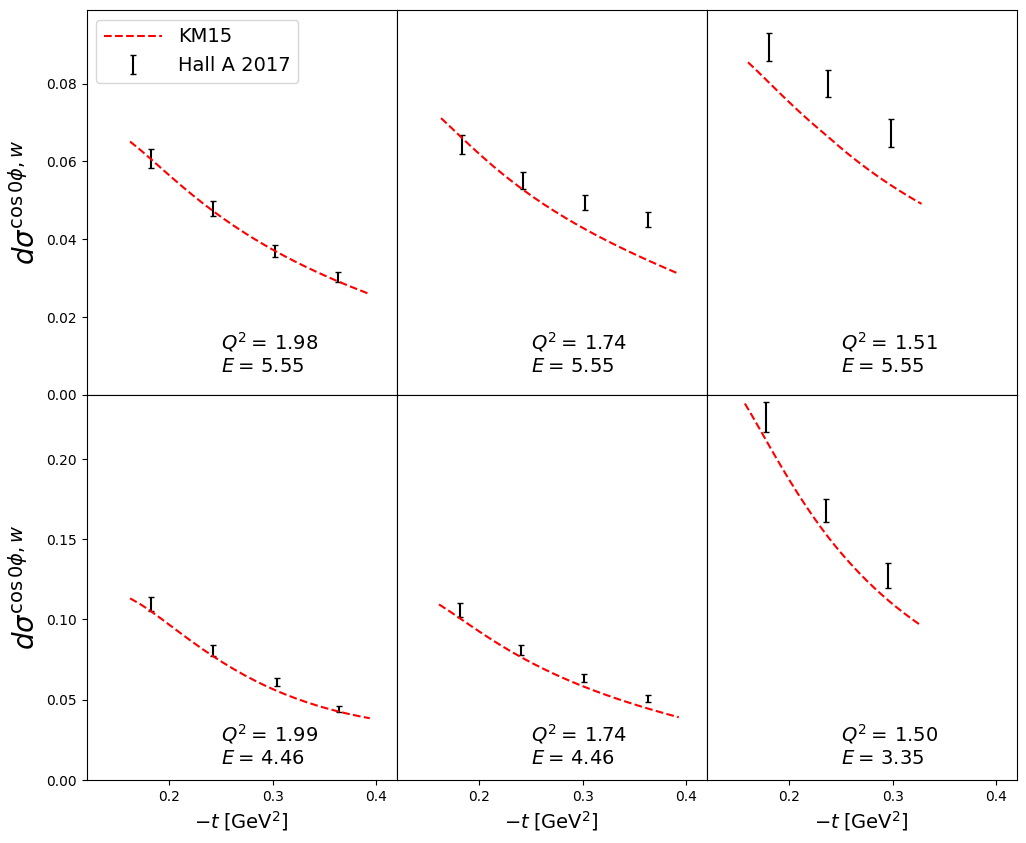

In [20]:
# Corresponding plots for 2017 Hall A data
fig = gdevel.plots.HallA17(observable='XUUcos0', lines=[th_KM15])

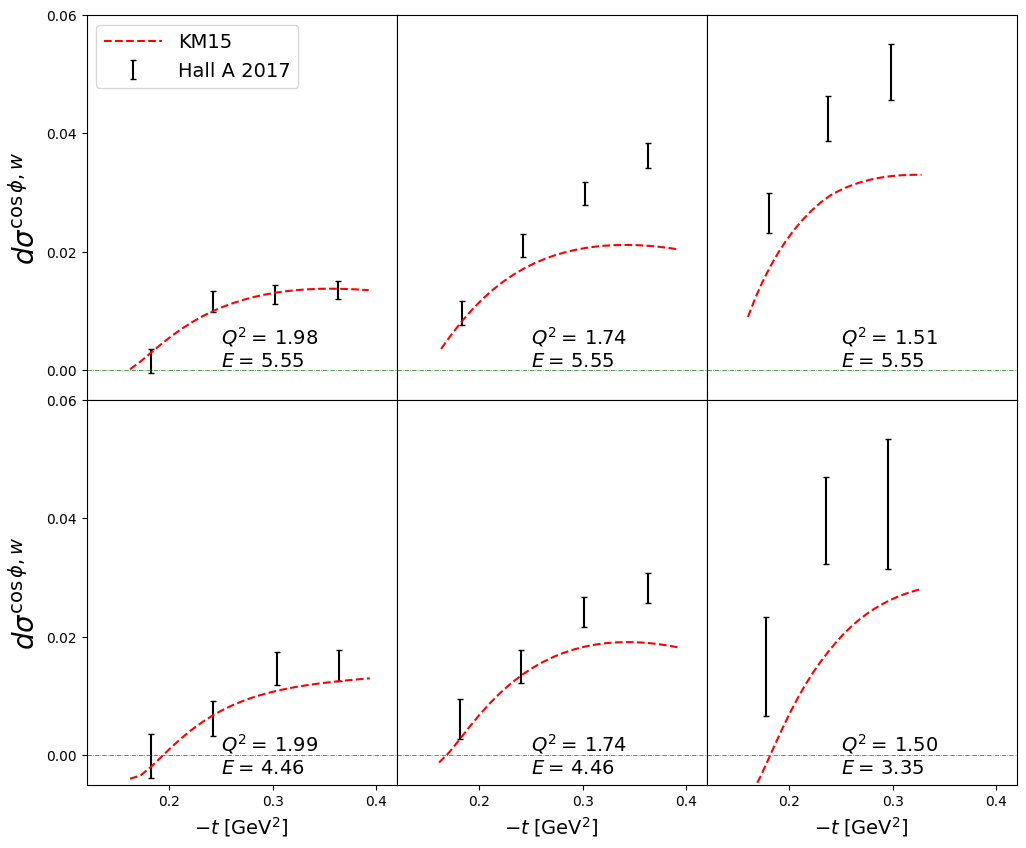

In [21]:
# Corresponding plots for 2017 Hall A data
fig = gdevel.plots.HallA17(observable='XUUcos1', lines=[th_KM15])

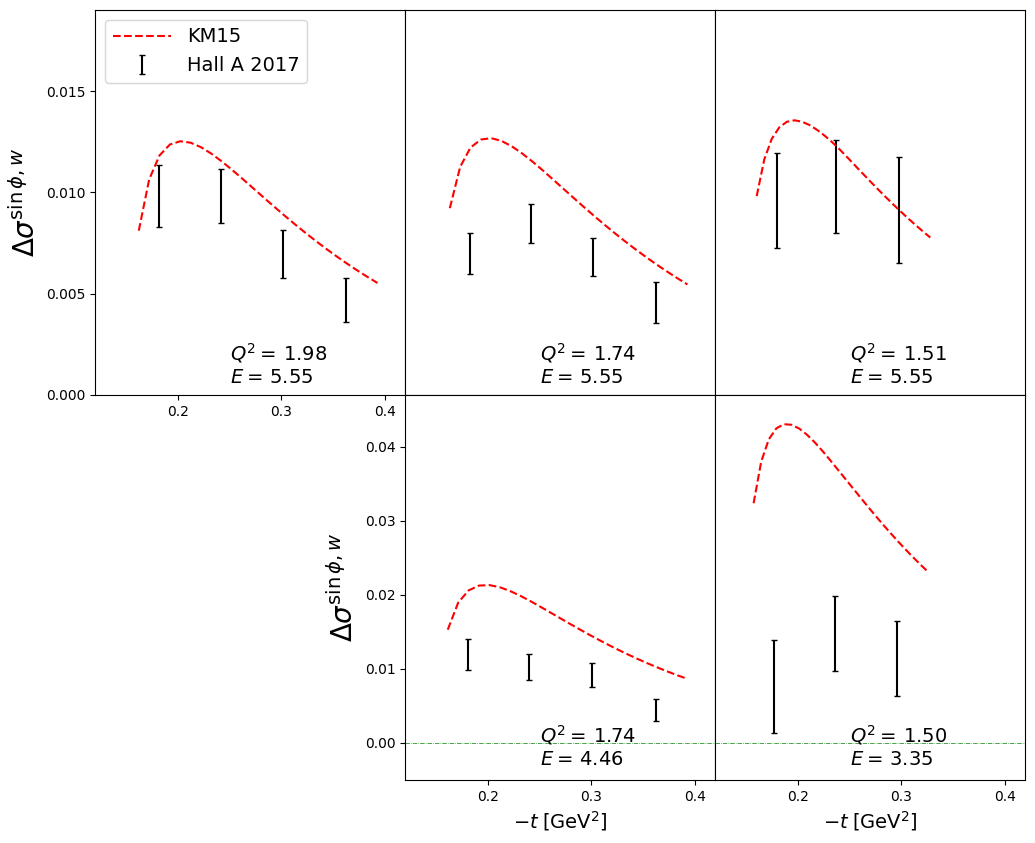

In [22]:
# Corresponding plots for 2017 Hall A data
fig = gdevel.plots.HallA17(observable='XLUsin1', lines=[th_KM15])

So description of 2017 data (which is a **prediction** of KM15!) is maybe not so brilliant, but also not catastrophic. It gets worse with low Q2, which can be considered understandable.

In [23]:
# To get some idea which CFFs are important in KM model,
# maybe as a guidance for choice of CFFs to use in NNet models
th_KM15.print_CFFs(g.dset[116][0])

 ImH =  3.44
 ReH = -2.44
 ImE =  0.00
 ReE =  2.21
ImHt =  1.56
ReHt =  1.40
ImEt =  0.00
ReEt = 141.36



# Neural net fits

## Loading models

In [24]:
class NN(g.model.NeuralModel, g.eff.KellyEFF, g.dvcs.BM10tw2):
    pass

In [25]:
old_map = {'XLUw': HallA15_XLUw, 'Xw': HallA15w}
new_map = {'Xw': HallA17w}
out_map = {'2C': ['ImH', 'ReH'], '4C': ['ImH', 'ReH', 'ImHt', 'ReEt'], 
           '4Ce': ['ImH', 'ReH', 'ImE', 'ReE'],
           '6C': ['ImH', 'ReH', 'ImE', 'ReE', 'ImHt', 'ImEt']}
xpow_map = {'zero': 0, 'half': -0.5, 'one': -1., 'three': -1.5}
xpow_map = {'zero': 0, 'half': -0.5, 'one': -1., 'three': -1.5}

In [26]:
# filename format: CFFs_XPOW_oldset_newset
#   if there is no newset, model is trained only on oldset, so ideally one should
#   compare same models, with same oldset, and one with additional newset
models = ['2C_zero_oldXw', '4C_zero_oldXw', '2C_zero_oldXw_newXw',
          '4C_zero_oldXw_newXw', '4Ce_zero_oldXw', '4Ce_zero_oldXw_newXw',
          '6C_zero_oldXw', '6C_zero_oldXw_newXw']
ths = {}
for model in models:
    outs, xpows, oldnew = model.split('_', maxsplit=2)
    thn = NN(output_layer=out_map[outs], q2in=True, xpow=xpow_map[xpows])
    subdir = 'nets'
    thn.name = model
    thn.props = {'lw': 1.5}
    # thn.nets += torch.load('{}/nets_{}.tar'.format(subdir, model))
    thn.nets += torch.load('nets_{}.tar'.format(model), weights_only=False)
    print("{} theory has {} trained nets".format(thn.name, len(thn.nets)))
    for net, mean, std in thn.nets:
        net.eval()
    ths[model] = thn

2C_zero_oldXw theory has 10 trained nets
4C_zero_oldXw theory has 10 trained nets
2C_zero_oldXw_newXw theory has 10 trained nets
4C_zero_oldXw_newXw theory has 10 trained nets
4Ce_zero_oldXw theory has 10 trained nets
4Ce_zero_oldXw_newXw theory has 10 trained nets
6C_zero_oldXw theory has 10 trained nets
6C_zero_oldXw_newXw theory has 10 trained nets


## Description of 2015 data

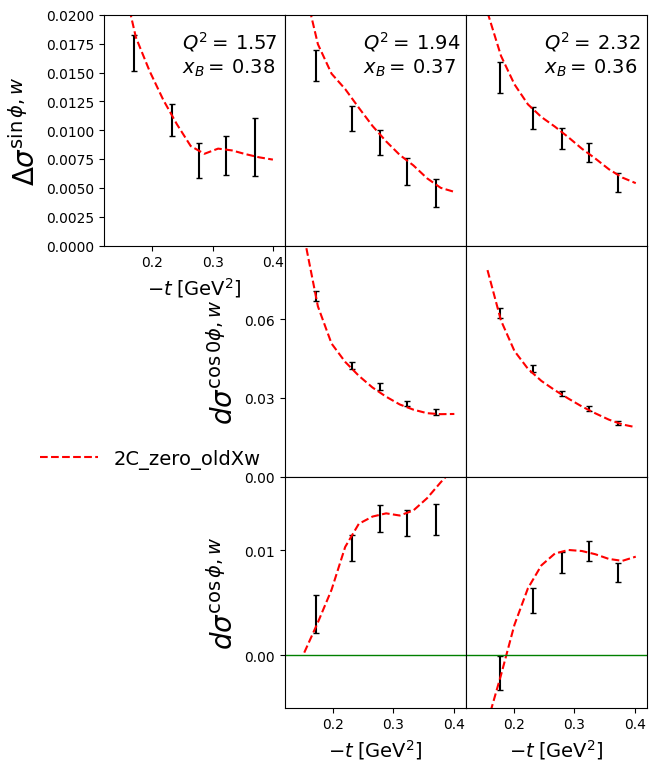

In [27]:
fig = gplots.HallA15(lines=[ths['2C_zero_oldXw']])

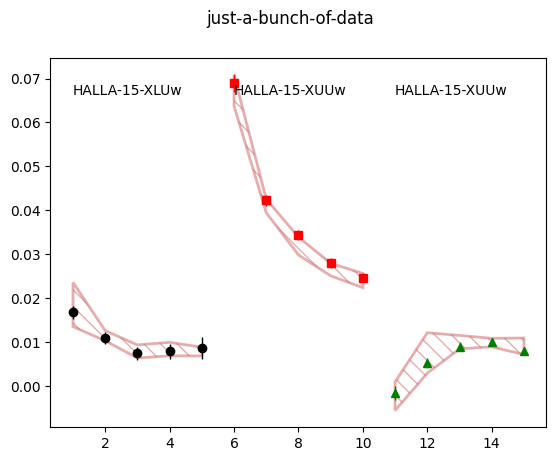

In [28]:
# Three of above plots (one from each row) with uncertainties:
fig = gplots.jbod(bands=[ths['2C_zero_oldXw']], points=[g.dset[117][:5], g.dset[116][:5], g.dset[116][15:]])

In [29]:
listchis([ths['2C_zero_oldXw'], ths['4C_zero_oldXw']])

                     2C_zero_ol4C_zero_ol
                       ------    ------  
HallA 15  XLUw_s1:       0.84      0.27   (np = 15)
HallA 15  XUUw_c0:       1.33      0.36   (np = 10)
HallA 15  XUUw_c1:       1.34      0.24   (np = 10)
HallA 17  XLUw_s1:      18.63     14.09   (np = 18)
HallA 17  XUUw_c0:      24.23     11.88   (np = 22)
HallA 17  XUUw_c1:      19.01     16.45   (np = 22)
                       ------    ------  
===       TOTAL  :      13.67      9.14   (np = 97)


2 CFF fit is acceptable for 2015 data and 4 CFF fit is perfect. "Prediction" of 2017 data from this fit is poor.

## Description of 2017 data

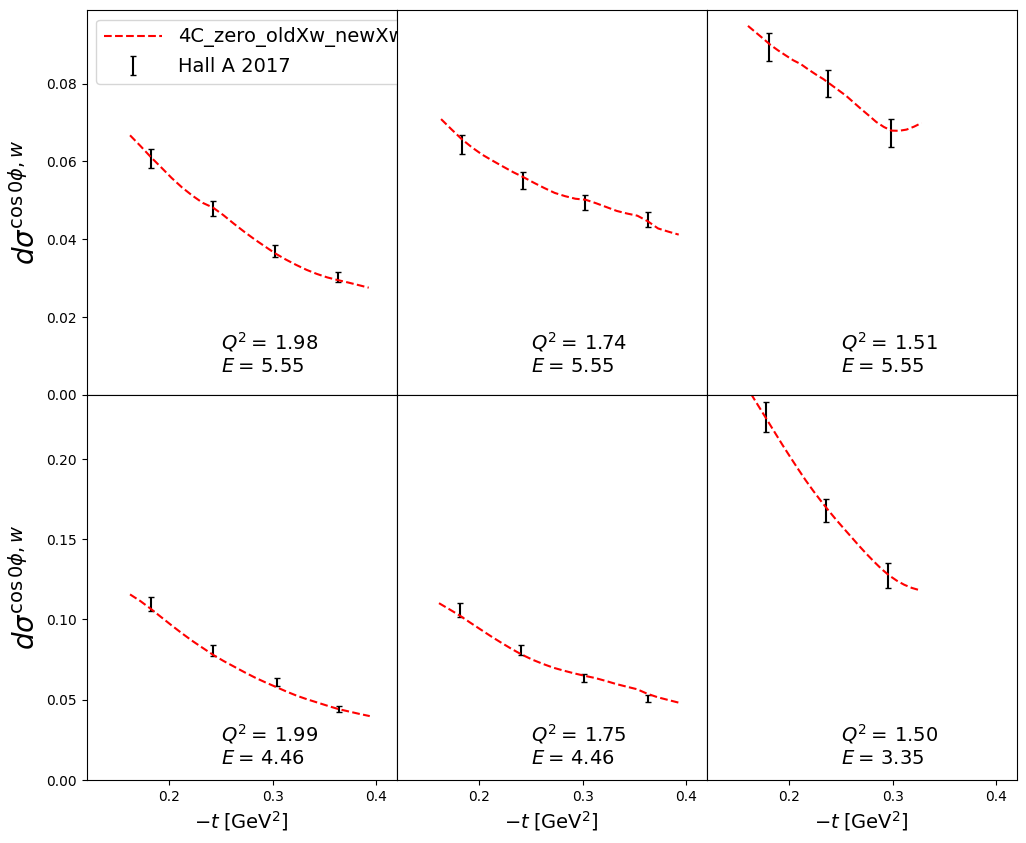

In [30]:
# Corresponding plots for 2017 Hall A data
fig = gplots.HallA17(observable='XUUcos0', lines=[ths['4C_zero_oldXw_newXw']])

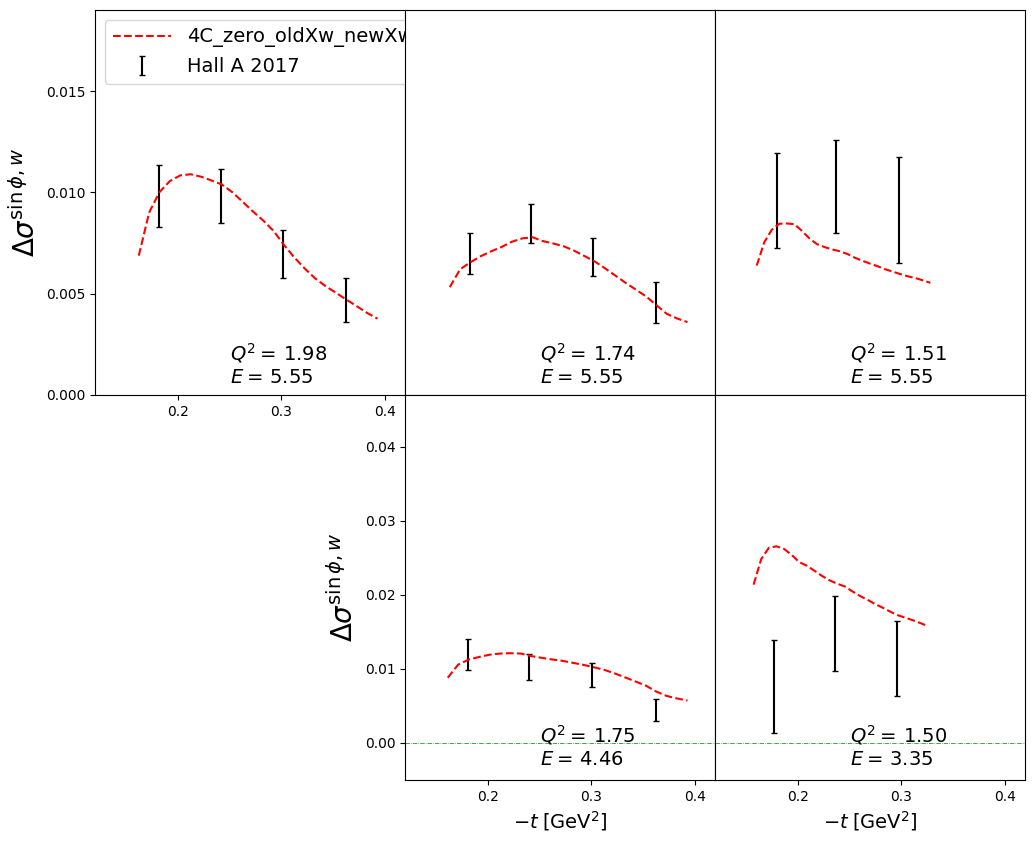

In [31]:
# Corresponding plots for 2017 Hall A data
fig = gplots.HallA17(observable='XLUsin1', lines=[ths['4C_zero_oldXw_newXw']])

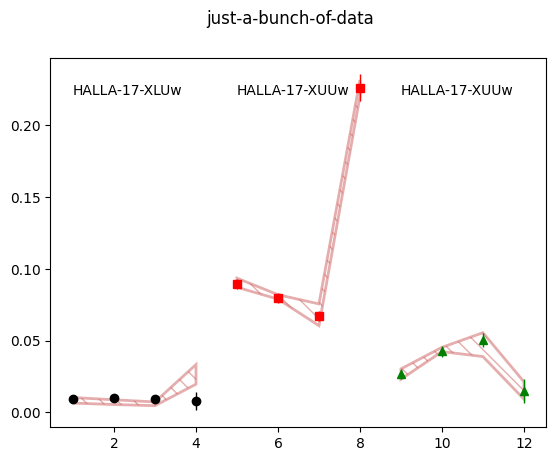

In [32]:
# Similar for 2017 data (Q2=2 GeV2 sets):
fig = gplots.jbod(bands=[ths['4C_zero_oldXw_newXw']], points=[g.dset[135][:4], g.dset[136][:4], g.dset[136][22:26]])

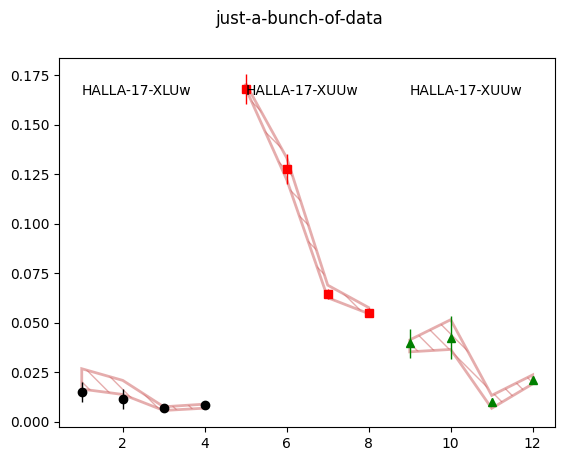

In [33]:
# Similar for 2017 data (Q2 = 1.75 GeV2 sets)
fig = gplots.jbod(bands=[ths['4C_zero_oldXw_newXw']], points=[g.dset[135][4:8], g.dset[136][4:8], g.dset[136][26:30]])

In [34]:
listchis([ths['2C_zero_oldXw_newXw'], ths['4C_zero_oldXw_newXw']])

                     2C_zero_ol4C_zero_ol
                       ------    ------  
HallA 15  XLUw_s1:       1.31      0.37   (np = 15)
HallA 15  XUUw_c0:       1.57      0.21   (np = 10)
HallA 15  XUUw_c1:       2.36      0.42   (np = 10)
HallA 17  XLUw_s1:       4.62      1.15   (np = 18)
HallA 17  XUUw_c0:       7.60      0.32   (np = 22)
HallA 17  XUUw_c1:       4.13      0.33   (np = 22)
                       ------    ------  
===       TOTAL  :       4.13      0.48   (np = 97)


Acceptable 2 CFF fit cannot be obtained for 2017 (+2015) data, but 4 CFF fit is OK.

# Resulting CFFs

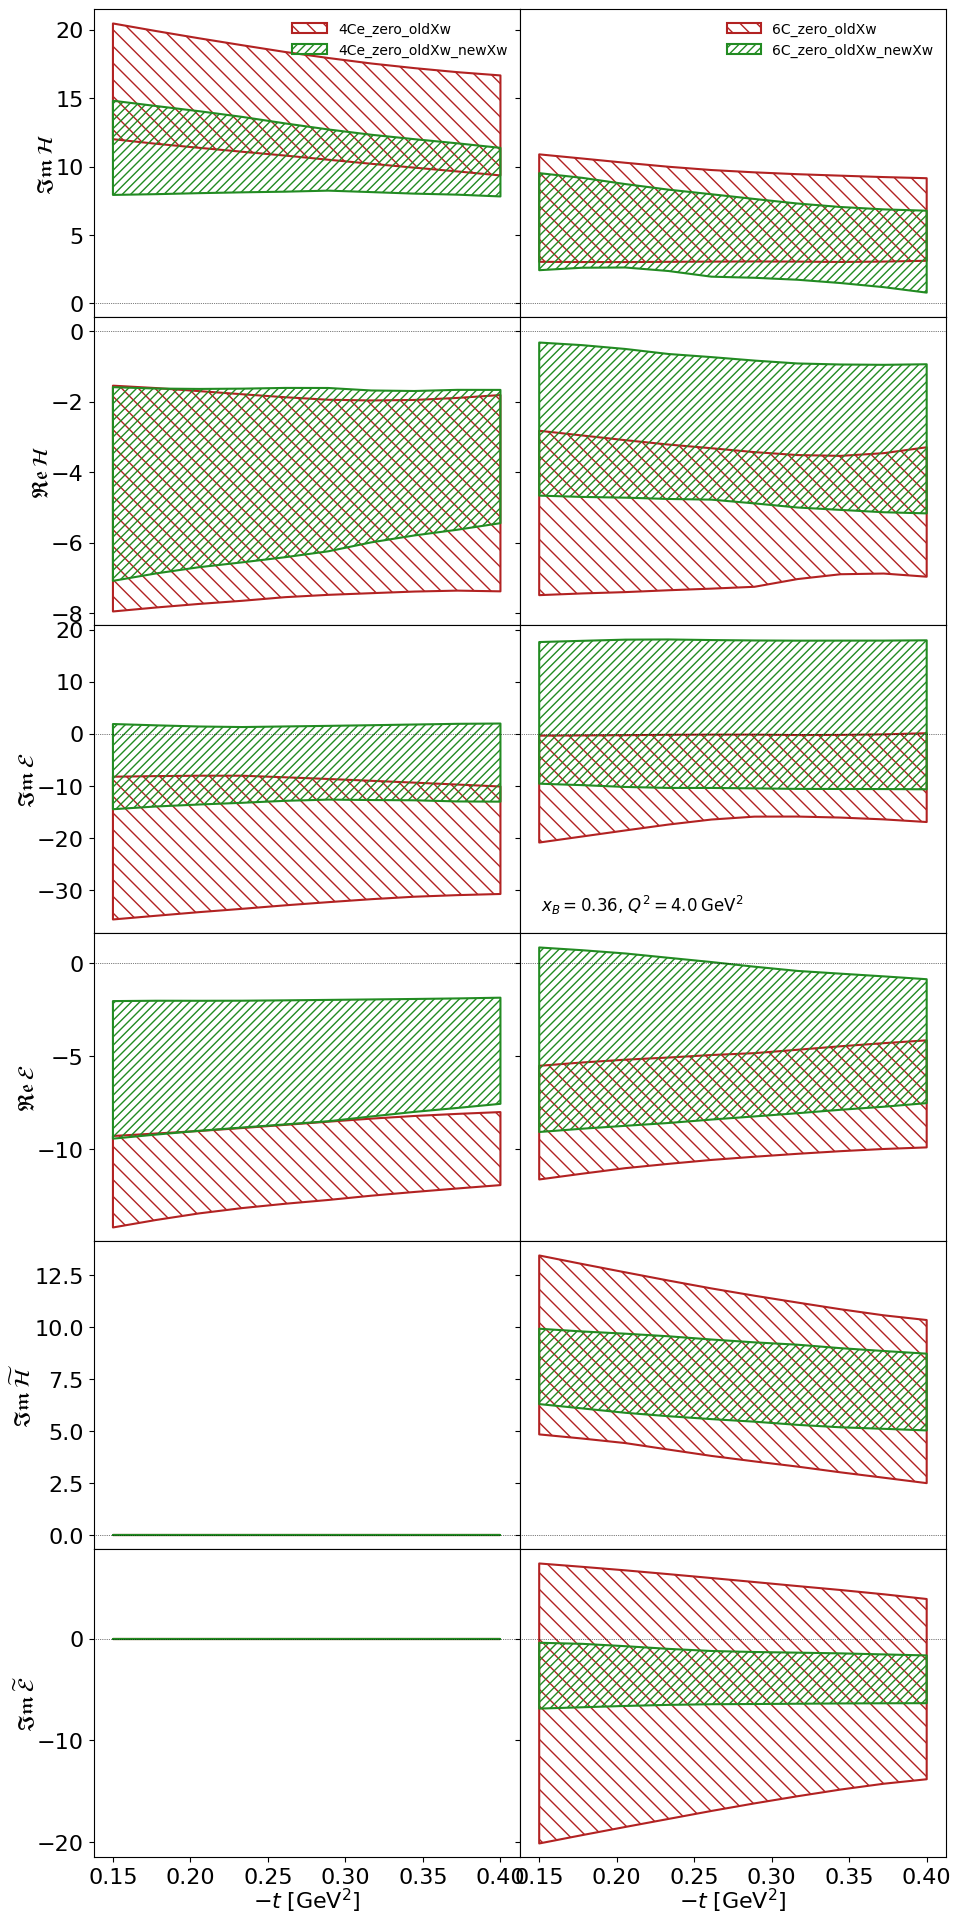

In [35]:
fig = CFFgridt(tha=[ [ths['4Ce_zero_oldXw'], ths['4Ce_zero_oldXw_newXw']],
                    [ths['6C_zero_oldXw'], ths['6C_zero_oldXw_newXw']] ], cffs=['ImH', 'ReH', 'ImE', 'ReE',
                                                                                'ImHt', 'ImEt'], npts=10)

There seems to be some overall statistical improvement brought by 2017 extra data but nothing dramatic or ascribable to a single CFFs.